In [1]:
from config import CONFIG
from utils import series_to_supervised

CONFIG

{'pair': 'BTC_ETH',
 'period': 300,
 'input_size': 60,
 'output_size': 12,
 'lstm_hidden_size': 50,
 'columns': ['Close', 'Volume'],
 'csv_src_file': 'BTC_ETH',
 'name': 'lstm',
 'folder': {'data': 'data/', 'weights': 'weights/'},
 'filename': 'BTC_ETH_lstm_i60_o12_Close_Volume'}

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
 
input_size = 100
#data file path
dfp = ''.join([CONFIG['folder']['data'], CONFIG['csv_src_file'], '.csv'])

#Columns of price data to use
columns = CONFIG['columns']
# df = pd.read_csv(dfp).dropna().tail(1000000)
dataset = pd.read_csv(dfp)

# to drop values before 2018 1514764800, March 2018 1519862400, July 2017 1498867200
dataset = dataset[dataset.Timestamp > 1519862400]
dataset.head()

,Close,Timestamp,High,Low,Open,Volume
269507,0.082828,1519862700,0.082856,0.082729,0.082729,4.151247
269508,0.082609,1519863000,0.082828,0.082606,0.082828,5.551513
269509,0.082552,1519863300,0.082673,0.082547,0.082609,2.327443
269510,0.082460,1519863600,0.082625,0.082419,0.082552,1.519736
269511,0.082455,1519863900,0.082460,0.082418,0.082455,0.552411


In [3]:
print(dataset.shape[0])

29582


In [4]:
#filter out unwanted columns and convert to numpy.ndarray
#loc[rows, cols] to get, .values gets values from a dataframe as a numpy.ndarray
values = dataset.loc[:,columns].values
print(values.shape[0])

29582


In [5]:
# parameters to prepare the dataset for learning 
n_lag = CONFIG['input_size']
n_out = CONFIG['output_size']
n_features = len(columns)
n_lag,n_features,n_out

(60, 2, 12)

In [6]:
# scale dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled.shape[0])

29582


In [7]:
# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, n_out)
reframed.head(10)

,var1(t-60),var2(t-60),var1(t-59),var2(t-59),var1(t-58),var2(t-58),var1(t-57),var2(t-57),var1(t-56),var2(t-56),...,var1(t+7),var2(t+7),var1(t+8),var2(t+8),var1(t+9),var2(t+9),var1(t+10),var2(t+10),var1(t+11),var2(t+11)
60,0.911499,0.005383,0.904896,0.007199,0.903185,0.003018,0.900404,0.001971,0.900251,0.000716,...,0.896031,0.000725,0.900122,0.002147,0.899499,0.002193,0.900826,0.003644,0.902605,0.000667
61,0.904896,0.007199,0.903185,0.003018,0.900404,0.001971,0.900251,0.000716,0.899950,0.001567,...,0.900122,0.002147,0.899499,0.002193,0.900826,0.003644,0.902605,0.000667,0.905607,0.001138
62,0.903185,0.003018,0.900404,0.001971,0.900251,0.000716,0.899950,0.001567,0.900536,0.001585,...,0.899499,0.002193,0.900826,0.003644,0.902605,0.000667,0.905607,0.001138,0.906037,0.001566
63,0.900404,0.001971,0.900251,0.000716,0.899950,0.001567,0.900536,0.001585,0.898062,0.002247,...,0.900826,0.003644,0.902605,0.000667,0.905607,0.001138,0.906037,0.001566,0.903877,0.000476
64,0.900251,0.000716,0.899950,0.001567,0.900536,0.001585,0.898062,0.002247,0.900530,0.001073,...,0.902605,0.000667,0.905607,0.001138,0.906037,0.001566,0.903877,0.000476,0.906416,0.003237
65,0.899950,0.001567,0.900536,0.001585,0.898062,0.002247,0.900530,0.001073,0.898052,0.000990,...,0.905607,0.001138,0.906037,0.001566,0.903877,0.000476,0.906416,0.003237,0.911383,0.002917
66,0.900536,0.001585,0.898062,0.002247,0.900530,0.001073,0.898052,0.000990,0.900246,0.001661,...,0.906037,0.001566,0.903877,0.000476,0.906416,0.003237,0.911383,0.002917,0.912647,0.003534
67,0.898062,0.002247,0.900530,0.001073,0.898052,0.000990,0.900246,0.001661,0.900536,0.000313,...,0.903877,0.000476,0.906416,0.003237,0.911383,0.002917,0.912647,0.003534,0.913068,0.005535
68,0.900530,0.001073,0.898052,0.000990,0.900246,0.001661,0.900536,0.000313,0.901199,0.001925,...,0.906416,0.003237,0.911383,0.002917,0.912647,0.003534,0.913068,0.005535,0.909149,0.004790
69,0.898052,0.000990,0.900246,0.001661,0.900536,0.000313,0.901199,0.001925,0.901833,0.000689,...,0.911383,0.002917,0.912647,0.003534,0.913068,0.005535,0.909149,0.004790,0.906146,0.001807


In [8]:
print(reframed.shape[0])

29511


In [9]:
# drop columns we don't want to predict
# We're only concerned with the estimating the close value,
# Close should be first in the list of column in the config file

cols_to_drop = []

for i in range (n_out):
    for j in range(1, n_features):
        cols_to_drop.append(reframed.shape[1]-(i*n_features+j))

reframed.drop(reframed.columns[cols_to_drop], axis=1, inplace=True)

pd.set_option('display.max_columns', 500)
reframed.head()

,var1(t-60),var2(t-60),var1(t-59),var2(t-59),var1(t-58),var2(t-58),var1(t-57),var2(t-57),var1(t-56),var2(t-56),var1(t-55),var2(t-55),var1(t-54),var2(t-54),var1(t-53),var2(t-53),var1(t-52),var2(t-52),var1(t-51),var2(t-51),var1(t-50),var2(t-50),var1(t-49),var2(t-49),var1(t-48),var2(t-48),var1(t-47),var2(t-47),var1(t-46),var2(t-46),var1(t-45),var2(t-45),var1(t-44),var2(t-44),var1(t-43),var2(t-43),var1(t-42),var2(t-42),var1(t-41),var2(t-41),var1(t-40),var2(t-40),var1(t-39),var2(t-39),var1(t-38),var2(t-38),var1(t-37),var2(t-37),var1(t-36),var2(t-36),var1(t-35),var2(t-35),var1(t-34),var2(t-34),var1(t-33),var2(t-33),var1(t-32),var2(t-32),var1(t-31),var2(t-31),var1(t-30),var2(t-30),var1(t-29),var2(t-29),var1(t-28),var2(t-28),var1(t-27),var2(t-27),var1(t-26),var2(t-26),var1(t-25),var2(t-25),var1(t-24),var2(t-24),var1(t-23),var2(t-23),var1(t-22),var2(t-22),var1(t-21),var2(t-21),var1(t-20),var2(t-20),var1(t-19),var2(t-19),var1(t-18),var2(t-18),var1(t-17),var2(t-17),var1(t-16),var2(t-16),var1(t-15),var2(t-15),var1(t-14),var2(t-14),var1(t-13),var2(t-13),var1(t-12),var2(t-12),var1(t-11),var2(t-11),var1(t-10),var2(t-10),var1(t-9),var2(t-9),var1(t-8),var2(t-8),var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var1(t+1),var1(t+2),var1(t+3),var1(t+4),var1(t+5),var1(t+6),var1(t+7),var1(t+8),var1(t+9),var1(t+10),var1(t+11)
60,0.911499,0.005383,0.904896,0.007199,0.903185,0.003018,0.900404,0.001971,0.900251,0.000716,0.899950,0.001567,0.900536,0.001585,0.898062,0.002247,0.900530,0.001073,0.898052,0.000990,0.900246,0.001661,0.900536,0.000313,0.901199,0.001925,0.901833,0.000689,0.904123,0.004102,0.904161,0.001904,0.898631,0.002870,0.898622,0.001366,0.900645,0.001475,0.902122,0.003711,0.901912,0.000501,0.898889,0.001275,0.897707,0.006063,0.896295,0.005163,0.901640,0.005457,0.894162,0.001330,0.901667,0.004633,0.902515,0.000511,0.902515,0.005043,0.903902,0.001018,0.911195,0.004273,0.909011,0.000288,0.908729,0.005163,0.903118,0.000774,0.904913,0.001256,0.909531,0.000620,0.907403,0.001534,0.907393,0.001065,0.907137,0.001018,0.903187,0.000341,0.903218,0.000487,0.903810,0.001179,0.909454,0.001097,0.907357,0.000555,0.911044,0.007564,0.910657,0.003413,0.907522,0.008177,0.900615,0.003681,0.906061,0.001641,0.899258,0.016586,0.903952,0.012982,0.899530,0.006698,0.899831,0.000562,0.907336,0.004833,0.907291,0.001092,0.901101,0.000096,0.902979,0.000749,0.898715,0.003541,0.899620,0.003343,0.902619,0.000657,0.898043,0.899926,0.904471,0.901639,0.904114,0.894464,0.894675,0.896031,0.900122,0.899499,0.900826,0.902605
61,0.904896,0.007199,0.903185,0.003018,0.900404,0.001971,0.900251,0.000716,0.899950,0.001567,0.900536,0.001585,0.898062,0.002247,0.900530,0.001073,0.898052,0.000990,0.900246,0.001661,0.900536,0.000313,0.901199,0.001925,0.901833,0.000689,0.904123,0.004102,0.904161,0.001904,0.898631,0.002870,0.898622,0.001366,0.900645,0.001475,0.902122,0.003711,0.901912,0.000501,0.898889,0.001275,0.897707,0.006063,0.896295,0.005163,0.901640,0.005457,0.894162,0.001330,0.901667,0.004633,0.902515,0.000511,0.902515,0.005043,0.903902,0.001018,0.911195,0.004273,0.909011,0.000288,0.908729,0.005163,0.903118,0.000774,0.904913,0.001256,0.909531,0.000620,0.907403,0.001534,0.907393,0.001065,0.907137,0.001018,0.903187,0.000341,0.903218,0.000487,0.903810,0.001179,0.909454,0.001097,0.907357,0.000555,0.911044,0.007564,0.910657,0.003413,0.907522,0.008177,0.900615,0.003681,0.906061,0.001641,0.899258,0.016586,0.903952,0.012982,0.899530,0.006698,0.899831,0.000562,0.907336,0.004833,0.907291,0.001092,0.901101,0.000096,0.902979,0.000749,0.898715,0.003541,0.899620,0.003343,0.902619,0.000657,0.898043,0.001283,0.899926,0.904471,0.901639,0.904114,0.894464,0.894675,0.896031,0.900122,0.899499,0.900826,0.902605,0.905607
62,0.903185,0.003018,0.900404,0.001971,0.900251,0.000716,0.899950,0.001567,0.900536,0.001585,0.898062,0.002247,0.900530,0.001073,0.898052,0.000990,0.900246,0.001661,0.900536,0.000313,0.901199,0.0

In [10]:
#ndarray.shape holds array dimensions in tuple form
print(reframed.values.shape[0])

29511


In [11]:
reframed_values = reframed.values
# split into train and test sets
training_size = int(0.8* reframed_values.shape[0])
train = reframed_values[:training_size, :]
test = reframed_values[training_size:, :]

In [12]:
# split into input and outputs
# n_obs is the length of input columns in our dataframe
n_obs = n_lag * n_features

# We're only concerned with the estimating the close value,
# Close should be first in the list of column in the config file

n_outputs = n_out * n_features
train_x, train_y = train[:, :n_obs], train[:, -n_out:]
test_x, test_y = test[:, :n_obs], test[:, -n_out:]

# reshape input to be 3D [samples, timesteps, features]
train_x = train_x.reshape((train_x.shape[0], n_lag, n_features))
test_x = test_x.reshape((test_x.shape[0], n_lag, n_features))

# reshape output to be 3D [samples, timesteps, features]
train_y = train_y.reshape(-1, n_out, 1)
test_y = test_y.reshape(-1, n_out, 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(23608, 60, 2) (23608, 12, 1) (5903, 60, 2) (5903, 12, 1)


In [13]:
model_name=''.join([CONFIG['folder']['weights'], CONFIG['filename'], '_model', '.json'])
model_weights_name=''.join([CONFIG['folder']['weights'], CONFIG['filename'], '_model_weights', '.h5'])

In [14]:
epochs=25
batch_size=4096

In [110]:
from keras.models import Sequential
from keras.layers import Dense, concatenate
from keras.layers import Input
from keras.layers import LSTM, CuDNNLSTM, GRU,CuDNNGRU
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from keras.layers import Dropout, Flatten
from keras.layers import Activation, BatchNormalization
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.callbacks import ModelCheckpoint
import keras

units= CONFIG['lstm_hidden_size']
dropout = .1

# design network
inputs = Input(shape=(60, 2))
convmodel = Conv1D(51, 2)(inputs)
for i in range(1, 48):
    convmodel = Conv1D(52-i, 2)(convmodel)

rnnlist = []
for i in range(12):
    rnnmodel = LSTM(15)(inputs)
    rnnlist.append(rnnmodel)
rnnmodel = concatenate(rnnlist)
rnnmodel = keras.layers.Reshape((12, 15))(rnnmodel)

convrnnprep = Conv1D(50, 12)(inputs)
convrnnlist = []
for i in range(12):
    convrnnmodel = LSTM(10)(convrnnprep)
    convrnnlist.append(convrnnmodel)
convrnn = concatenate(convrnnlist)
convrnn = keras.layers.Reshape((12, 10))(convrnn)

combined = concatenate([convmodel, rnnmodel, convrnn])
combined = TimeDistributed(Dense(1))(combined)
#model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2]), activation=None))
#model.add(RepeatVector(n_out))

#model.add(LSTM(60))
#model.add(Dropout(.1))



# We're only concerned with the estimating the close value,
# otherwise use n_outputs instead of 1
# Dense(n_outputs, ...
#model.add(TimeDistributed(Dense(1)))
model = keras.Model(inputs=inputs, outputs=combined)
model.compile(loss='mse', optimizer='adam')

# store model
# serialize model to JSON
model_json = model.to_json()
with open(model_name, "w") as json_file:
    json_file.write(model_json)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           (None, 60, 2)        0                                            
__________________________________________________________________________________________________
conv1d_1935 (Conv1D)            (None, 59, 51)       255         input_38[0][0]                   
__________________________________________________________________________________________________
conv1d_1936 (Conv1D)            (None, 58, 51)       5253        conv1d_1935[0][0]                
__________________________________________________________________________________________________
conv1d_1937 (Conv1D)            (None, 57, 50)       5150        conv1d_1936[0][0]                
__________________________________________________________________________________________________
conv1d_193

In [111]:
# fit network
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,
                    validation_data=(test_x, test_y), verbose=1, shuffle=False,
                    callbacks=[ModelCheckpoint(model_weights_name, monitor='val_loss', verbose=1,save_best_only='true',
                                              save_weights_only=True)])

Train on 23608 samples, validate on 5903 samples
Epoch 1/25
23608/23608 [==============================] - 56s 2ms/step - loss: 0.2893 - val_loss: 0.2751

Epoch 00001: val_loss improved from inf to 0.27510, saving model to weights/BTC_ETH_lstm_i60_o12_Close_Volume_model_weights.h5
Epoch 2/25
23608/23608 [==============================] - 20s 863us/step - loss: 0.0583 - val_loss: 0.0236

Epoch 00002: val_loss improved from 0.27510 to 0.02358, saving model to weights/BTC_ETH_lstm_i60_o12_Close_Volume_model_weights.h5
Epoch 3/25
23608/23608 [==============================] - 21s 878us/step - loss: 0.0478 - val_loss: 0.0072

Epoch 00003: val_loss improved from 0.02358 to 0.00718, saving model to weights/BTC_ETH_lstm_i60_o12_Close_Volume_model_weights.h5
Epoch 4/25
23608/23608 [==============================] - 21s 873us/step - loss: 0.0348 - val_loss: 0.0123

Epoch 00004: val_loss did not improve from 0.00718
Epoch 5/25
23608/23608 [==============================] - 21s 877us/step - loss: 

In [112]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           (None, 60, 2)        0                                            
__________________________________________________________________________________________________
conv1d_1935 (Conv1D)            (None, 59, 51)       255         input_38[0][0]                   
__________________________________________________________________________________________________
conv1d_1936 (Conv1D)            (None, 58, 51)       5253        conv1d_1935[0][0]                
__________________________________________________________________________________________________
conv1d_1937 (Conv1D)            (None, 57, 50)       5150        conv1d_1936[0][0]                
__________________________________________________________________________________________________
conv1d_193

In [113]:
# Load the best weights
model.load_weights(model_weights_name)
model.compile(loss='mse', optimizer='adam')
model.evaluate(test_x, test_y)

5903/5903 [==============================] - 123s 21ms/step


0.00022245472163341716

In [114]:
from matplotlib import pyplot

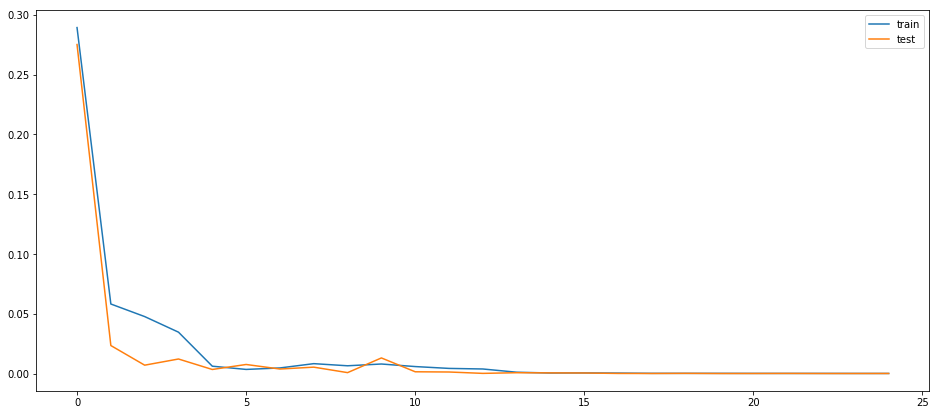

In [115]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [116]:
# Test the prediction of test data
y = model.predict(test_x)

In [117]:
print(y)

[[[0.89370847]
  [0.8941554 ]
  [0.8921354 ]
  ...
  [0.9068522 ]
  [0.90129775]
  [0.9033782 ]]

 [[0.89269084]
  [0.89432865]
  [0.8898143 ]
  ...
  [0.906184  ]
  [0.90072817]
  [0.9034941 ]]

 [[0.89296615]
  [0.89224124]
  [0.89111066]
  ...
  [0.90465367]
  [0.90097696]
  [0.9023254 ]]

 ...

 [[0.7624873 ]
  [0.76231253]
  [0.75495976]
  ...
  [0.75079954]
  [0.75208455]
  [0.7541791 ]]

 [[0.76177305]
  [0.7606786 ]
  [0.7531638 ]
  ...
  [0.75130105]
  [0.7530452 ]
  [0.7575472 ]]

 [[0.75973284]
  [0.75883037]
  [0.7512839 ]
  ...
  [0.750189  ]
  [0.7578398 ]
  [0.75663   ]]]


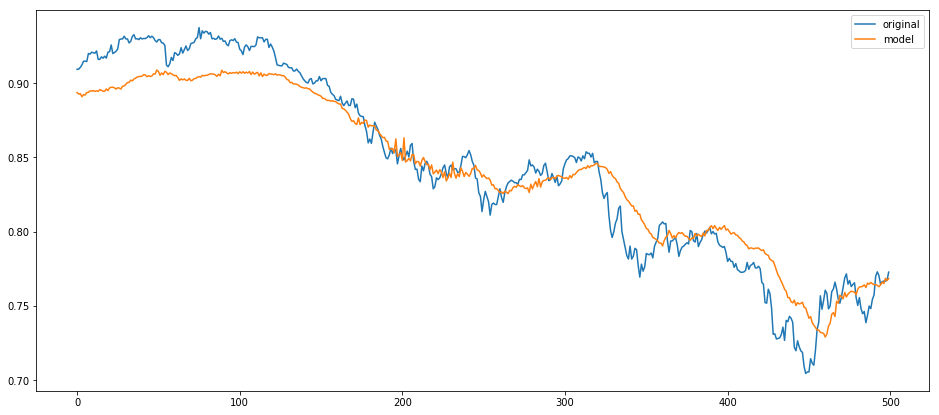

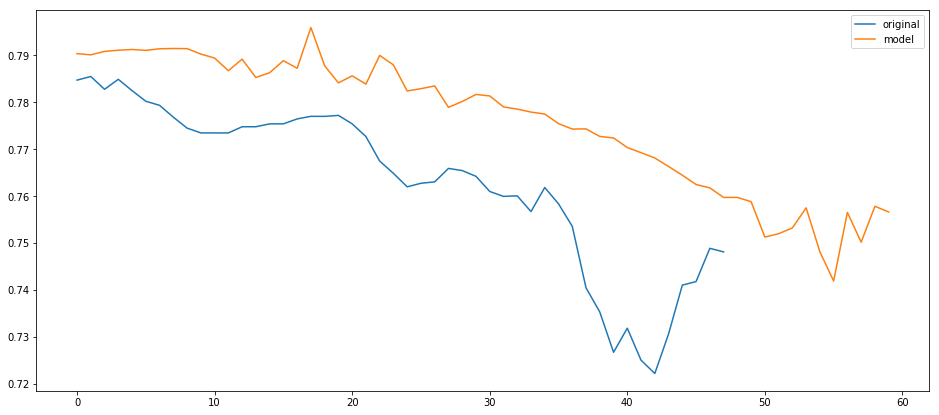

In [118]:
a = test_y[:,0]
b = y[:,0]
c = np.append(b, y[-1], axis=0)

pyplot.rcParams["figure.figsize"] = [16,7]
# Show how the model fits the test data
pyplot.plot(a[:500], label='original')
pyplot.plot(b[:500], label='model')
pyplot.legend()
pyplot.show()

# Show how the model predicts data
pos = int(a.shape[0]-n_out*4)
pyplot.plot(a[pos:], label='original')
pyplot.plot(c[pos:], label='model')
pyplot.legend()
pyplot.show()


In [104]:
print(c)

[[0.91679865]
 [0.9129281 ]
 [0.916991  ]
 ...
 [0.7308158 ]
 [0.7361067 ]
 [0.7354168 ]]


In [ ]:
#Prediction on public data!
period = CONFIG['period']
import time
import urllib
import json

# Download a live bitcoin price data set
def dl_X(now = None, points = n_lag, period = period, pair=CONFIG['pair']):
    if now == None:
        now = time.time() 
    end = now - now % period
    #print end, time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(end))
    start = end - points*period
    #print start, time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(start))
    url = "https://poloniex.com/public?command=returnChartData&currencyPair=%s&start=%d&end=%d&period=%d" % (pair, start, end, period)
    openUrl = urllib.request.urlopen(url)
    r = openUrl.read()
    openUrl.close()
    d = json.loads(r.decode())[-n_lag:]
    df = pd.DataFrame(d)
    original_columns=[u'close', u'date', u'high', u'low', u'open',u'volume']
    new_columns = ['Close','Timestamp','High','Low','Open','Volume']
    df = df.loc[:,original_columns]
    df.columns = new_columns
    
    return df

In [ ]:
def predict(when=None):
    rt_df = dl_X(when)
    rt_values = rt_df.loc[:,columns].values
    rt_scaled = scaler.transform(rt_values)
    rt_x = rt_scaled.reshape((1, n_lag, n_features))
    print(rt_x.shape)
    return rt_scaled, model.predict(rt_x)

In [ ]:
# do some now & past predictions
for t in [0, 100, 200, 300, 500, 1000, 2000]:
    rt_x, prediction = predict(time.time()-t*period)

    current = rt_x[:,0]
    prediction = prediction[0]

    pyplot.plot(current, label='current')

    # shift train predictions for plotting
    predictPlot = np.empty_like(current)
    predictPlot[:] = np.nan
    predictPlot = np.append(predictPlot, prediction)

    pyplot.plot(predictPlot, label='prediction')
    pyplot.legend()
    pyplot.show()

In [ ]:
#Prediction on live data!
"""
starttime=time.time()
while True:
    now = time.time() 
    end = now - now % period
    print(time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(end)))
    rt_x, prediction = predict()

    current = rt_x[:,0]
    prediction = prediction[0]

    pyplot.plot(current, label='current')

    # shift train predictions for plotting
    predictPlot = np.empty_like(current)
    predictPlot[:] = np.nan
    predictPlot = np.append(predictPlot, prediction)

    pyplot.plot(predictPlot, label='prediction')
    pyplot.legend()
    pyplot.show()

    time.sleep(period - ((time.time() - starttime) % period))"""